In [99]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [100]:
df = pd.read_csv('data.csv', sep=',', index_col=0)

In [101]:
df = df.drop(['RepoAge', 'RepoLife'], axis=1)

In [102]:
df

,diskUsage,forkCount,isFork,Python,unclosed_issues,assign_,assign_bio,stargazer_,milestone,milestone_closed,release_,Ruby,Shell,HTML,JavaScript,Makefile,CSS,C++,C,CMake,Java,label,languageCounter,popularLanguageCounter,hasLanguage,description len,has description,has issue,stargazer100,stargazer non zero,has milestone
0,0.3280,41,0,1.000000,0.1111,51.0,0.0,1.00,0.0000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0556,0.1111,0,0.7531,0,0,0,0,0
1,0.2527,0,0,0.000000,0.0000,3.0,0.0,0.02,0.0000,0.000,0.0000,0.864236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.1111,0.1111,0,0.5062,0,1,1,0,0
2,0.4521,0,1,0.012633,0.0000,1.0,0.0,0.00,0.0000,0.000,0.0000,0.000000,0.006970,0.001454,0.009572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.2778,0.4444,0,0.3951,0,1,1,1,0
3,0.6440,0,1,0.999609,0.0000,1.0,0.0,0.00,0.0000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000391,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.1111,0.2222,0,0.2593,0,1,1,1,0
4,0.2592,457,0,0.000000,1.0000,5.0,0.0,1.00,0.0000,0.000,0.0000,0.000000,0.013506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.1111,0.1111,0,1.0000,0,0,0,0,0
5,0.1738,42,0,0.000000,0.1111,20.0,0.0,0.83,0.0000,0.000,0.0000,0.000000,0.000000,0.142864,0.857136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.1111,0.2222,0,0.0000,1,0,1,0,0
6,0.3851,431,0,0.964556,1.0000,17.0,0.0,1.00,0.0312,0.000,0.0000,0.000000,0.000536,0.028218,0.000000,0.000000,0.006689,0.000000,0.000000,0.000000,0.000000,1,0.2222,0.4444,0,0.3210,0,0,0,0,0
7,0.2618,0,0,0.000000,0.0000,1.0,0.0,0.00,0.0000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0000,0.0000,1,0.0000,1,1,1,1,0
8,0.5150,296,0,0.031158,0.7778,6.0,0.0,1.00,0.0000,0.000,0.0000,0.000000,0.000600,0.000000,0.000000,0.000160,0.000000,0.965674,0.001075,0.000672,0.000000,1,0.4444,0.6667,0,0.3951,0,0,0,0,0
9,0.5130,0,1,0.031565,0.0000,1.0,0.0,0.00,0.0000,0.000,0.0000,0.000000,0.000608,0.000000,0.000000,0.000162,0.000000,0.965224,0.001089,0.000681,0.000000,0,0.4444,0.6667,0,0.3951,0,1,1,1,0


In [103]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [104]:
df_x = df.drop('label', axis=1)

In [105]:
df_y = df['label']

In [106]:
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=test_size, random_state=seed)

In [107]:
xgb = XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [108]:
y_pred = xgb.predict(X_test)

c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [109]:
accuracy_score(y_test, y_pred)

0.9019455252918288

In [110]:
f1_score(y_test, y_pred)

0.37

In [111]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, df_x, df_y, cv=10)

c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

KeyboardInterrupt: 

In [34]:
scores.mean()

0.8419689344922989

In [35]:
scores.std()

0.055468154089173625

In [36]:
xgb.feature_importances_

array([0.02869251, 0.03487767, 0.04323792, 0.02589995, 0.02418102,
       0.03415209, 0.05736797, 0.05308528, 0.        , 0.16734247,
       0.04314878, 0.0167126 , 0.05194874, 0.03138039, 0.03161127,
       0.05527508, 0.02257219, 0.03068704, 0.02162484, 0.02691766,
       0.02496112, 0.03854695, 0.02679101, 0.04712867, 0.0250332 ,
       0.        , 0.02676586, 0.        , 0.        , 0.01005776,
       0.        , 0.        ], dtype=float32)

In [74]:
xgb.get_booster().get_score(importance_type='gain')

{'C': 2.4259204705675677,
 'C++': 2.51129730812766,
 'CMake': 3.873122057529411,
 'CSS': 2.756343296846154,
 'HTML': 4.270357450131147,
 'Java': 2.471273420185185,
 'JavaScript': 2.1349548452745095,
 'Makefile': 2.8913658570392156,
 'Python': 2.937567451619049,
 'Ruby': 2.7510802367391296,
 'Shell': 2.646056336421875,
 'assign_': 4.897978803179593,
 'description len': 2.6383486104888902,
 'diskUsage': 2.5010494240187637,
 'forkCount': 3.2474546148351653,
 'isFork': 3.9002435400000004,
 'languageCounter': 4.557328419245614,
 'milestone': 2.7367435110909093,
 'milestone_closed': 0.9061773603333334,
 'popularLanguageCounter': 2.5287424671627905,
 'release_': 4.684989057236843,
 'stargazer100': 3.32209778,
 'stargazer_': 16.709356430070276,
 'unclosed_issues': 6.601985081758621}

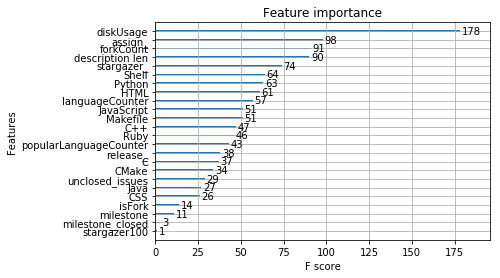

In [75]:
%matplotlib inline
from xgboost import plot_importance
plot_importance(xgb)

In [112]:
df = pd.read_csv('data.csv', sep=',', index_col=0)

In [113]:
df = df.drop(['label', 'RepoAge'], axis=1)

In [114]:
df_x = df.drop('RepoLife', axis=1)

In [115]:
df_y = df['RepoLife']

In [116]:
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=test_size, random_state=seed)

In [117]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

c:\program files\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [118]:
y_pred = xgb.predict(X_test)

In [119]:
pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).sort_values(['y_true'])

,y_true,y_pred
1728,0,148.017197
3448,0,43.814220
1629,0,21.191206
1490,0,60.437412
3871,0,113.103905
2582,0,52.175606
1954,0,62.509426
73,0,13.792917
531,0,35.208961
1351,0,182.306931
